### IBM HR Analytics Employee Attrition & Performance


***Need for HR Analytics:***


*HR analytics is the systematic identification and quantification of the people drivers of business outcomes (Heuvel & Bondarouk, 2016).*

Analytics is always an important topic and trend in every part of business and HR is also not far behind. 
Human Resources analytics provides an organization with insights for effectively managing employees so that business goals can be reached quickly and efficiently. By accurately predicting attrition risks of current employees, you can take real steps to keep your talent happy, engaged, and less susceptible to competitive overtures. 




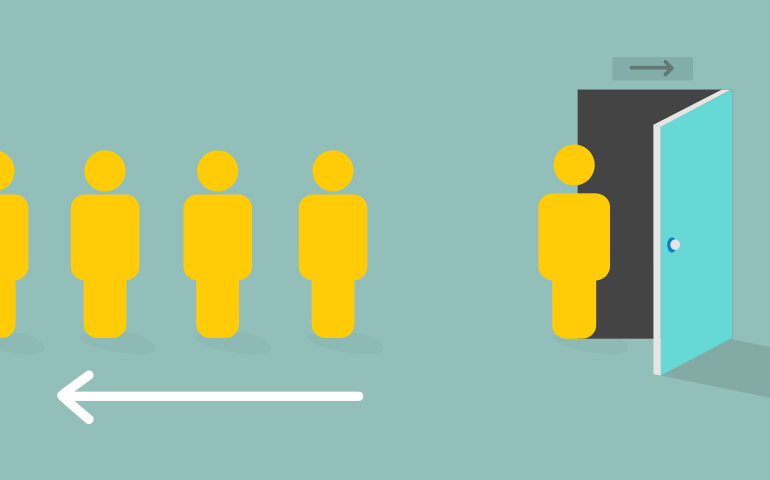



***Scope***

Through this project we will uncover the factors that may lead to employee attrition and build a predctive machine learning model to identify employees that may leave the company. 

This is a fictional data set created by IBM data scientists and can be found on Kaggle __[here](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home)__






***Import the necessary Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

***Load the Data Set and let's have a peek at the data***

In [105]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

data.head()

#The data consists of levels for a few features. The levels for these features are as follows:

#Education                1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
#EnvironmentSatisfaction  1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#JobInvolvement           1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#JobSatisfaction          1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#PerformanceRating        1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
#RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#WorkLifeBalance          1 'Bad' 2 'Good' 3 'Better' 4 'Best'


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [8]:

# By taking a glance at our dataset, we can observe that there are 34 features and 1 target variable: "Attrition". 
# We can start asking questions relating to employee attrition such as: 
# 1) Is distance from home a factor in employee attrition? 
# 2) Does Marital status play a role in employee attrition? 
# 3) Do Employees get frequent training to cope with the job? 



***Data Exploration*** 

It is a good practice to perform some data exploration to get a better understanding our data set. <br>

Lets perform some data visualizations using the matplotlib and seaborn pakages

In [9]:
# Are there any missing  values? 

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

We do not have any missing values. However, our data has a mix of numeric and categorical features. Therefore, we have to remember to convert our categorical features to numerics while training our predictive machine learning model later.  

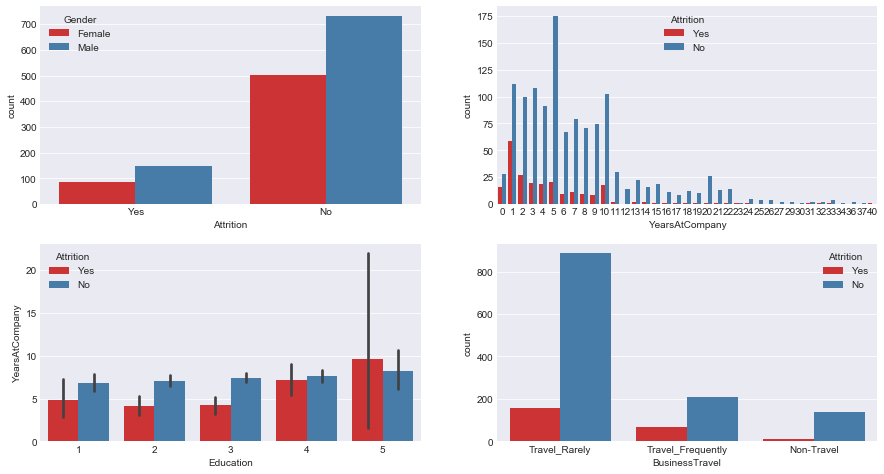

In [77]:
# Lets what are some of the factors are affecting the employees to leave the organization. 

sns.set_style('darkgrid')

f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,8))
sns.countplot(data['Attrition'], hue=data['Gender'], palette='Set1',ax=ax1)
sns.countplot(data['YearsAtCompany'], hue=data['Attrition'], palette='Set1', ax=ax2)
sns.barplot(data['Education'], data['YearsAtCompany'], hue=data['Attrition'],palette='Set1', ax=ax3)
sns.countplot(data['BusinessTravel'], hue=data['Attrition'], palette='Set1', ax=ax4)


# Observations from the plots: 

# Plot 1: Our data set shows us that the number of male employees leaving the organization is higher that the female employees

# Plot 2: The attrition rate is low for the employees spending more than 10 years at the company. 

# Plot 3: Employees with a doctorate degree tend to leave the company more than employees with lower degrees. 

# Plot 4: Employees who travel rarely are leaving the company more than employees who do not travel or travel frequently. 


***Some more exploratory analysis***

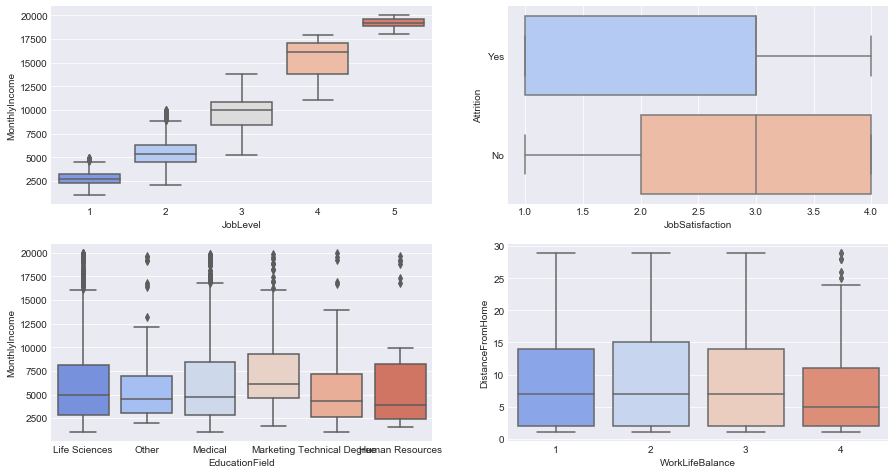

In [78]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,8))
sns.boxplot(data['JobLevel'], data['MonthlyIncome'], palette='coolwarm', ax=ax1)
sns.boxplot(data['JobSatisfaction'], data['Attrition'], palette='coolwarm', ax=ax2)
sns.boxplot(data['EducationField'], data['MonthlyIncome'], palette='coolwarm', ax=ax3)
sns.boxplot(data['WorkLifeBalance'], data['DistanceFromHome'], palette='coolwarm', ax=ax4)


# Observations from the plots: 

# Plot 1: As an employees job level increases his average monthly income also increases. 

# Plot 2: Employees with lower job satisfaction are leaving the company more. 

# Plot 3: The average monthly salary of employees in marketing is higher than other employees. 

# Plot 4: Employees staying closer to the work place have higher rating in work life balance. 


***Predicting Employee Attrition***

Our objective is to predict employee attrition. So, this is a classification problem. 

***Classification***

Classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known. <br>

Classification is 

As our data consists of numerical and categorical data we need to treat them diferently. 
Lets start with finding the correlation between our numerical features. 

In [89]:
numerical_data = data.select_dtypes(exclude='object')
categorical_data = data.select_dtypes(include='object')

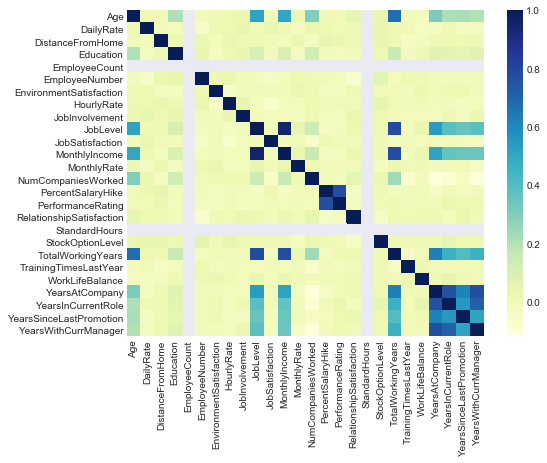

In [93]:
plt.figure(figsize=(8,6))
sns.heatmap(numerical_data.corr(), cmap='YlGnBu')

From the above correlation plot we can observe that we have poorly correlated(values towards 0) and strongly correlated (values towards 1) features. 
Our model should be trained on as many poorly correlated features as possible to get a better prediction. We can remove the strongly correlated features from the data so that the model can train better. 

In [94]:
numerical_data = numerical_data.drop(['YearsAtCompany', 'YearsInCurrentRole',
                           'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PercentSalaryHike', 'PerformanceRating'], axis=1)

Lets turn our attention to the categorical variables. As our machine learning model needs numerical data as an input, we need to convert our categorical features into numerical ones. 

In [96]:
# Attrition consists of 'Yes' and 'No'. Lets change that to 1 and 0. 
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
categorical_data['Attrition'] = categorical_data["Attrition"].apply(lambda x: target_map[x])


In [108]:
# Now lets convert the rest of the categorical features using pandas get_dummies to not fall into the dummy variable trap. 
categorical_data = pd.get_dummies(categorical_data)

In [99]:
# Now we combine our numerical and categorical data to create a final data frame to train our model upon. 

final_data = pd.concat([numerical_data, categorical_data], axis=1)

In [102]:
final_data.head(2)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   

       ...       JobRole_Research Director  JobRole_Research Scientist  \
0      ...                               0                           0   
1      ...                               0                           1   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                        1                             0   
1                        0                             0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   
1                       0                      1                     0   

   Over18_Y  OverTime_No  OverTime_Yes  
0         1            0             1  
1         1            1             0  

[2 rows x 50 columns]

***Feature Selection and Engineering***




We can remove some of the below features from our data as they do not provide any predictive value for our model. <br>

EmployeeCount = Variable that just counts employees, No predictive Value<br>
EmployeeNumber = Unique ID for employee, No Predictive Value <br>
StandardHours = All were 80, No Predictive Value




In [107]:
final_data = final_data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

***Model building***

We will try a few classification techniques as well as an artificial neural network. 

In [122]:
# Import of necessary modules

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [239]:
# Split the data into training data and testing data

x = final_data.drop('Attrition', axis=1) # Features
y = final_data['Attrition'] # Target variable

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)



In [240]:
# Lets call our classifiers

rf_model = RandomForestClassifier()
log_model = LogisticRegression()
dec_model = DecisionTreeClassifier()
svc_model = SVC()


In [241]:
models = ['Random Forest Classifier', 'Logistic Regression Classifier', 'Decision Tree Classifier', 'Support Vector Classifier']
classifier = [rf_model, log_model, dec_model, svc_model]
model_acc = []

In [243]:
# Lets build our models on our training data

for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, pred)
    model_acc.append(acc)

    
for i,j in zip(models, model_acc):
    print('Accuracy of {} : {}'.format(i,j))

Accuracy of Random Forest Classifier : 0.8662131519274376
Accuracy of Logistic Regression Classifier : 0.8752834467120182
Accuracy of Decision Tree Classifier : 0.7936507936507936
Accuracy of Support Vector Classifier : 0.8616780045351474


In [244]:
from sklearn.cross_validation import cross_val_score

In [246]:
for i,j in zip(models, classifiers):
    a = cross_val_score(estimator = j, X=x_train, y=y_train, cv=10)
    print('{} : {}'.format(i, a.mean()))

Random Forest Classifier : 0.8454610186120751
Logistic Regression Classifier : 0.8620616058223141
Decision Tree Classifier : 0.7667678908755436
Support Vector Classifier : 0.8289830719442369


In [256]:
# Let us try to perform some parameter tuning and see if we can better the accuracy of our best performing classifier

from sklearn.model_selection import GridSearchCV

In [249]:
penalty = ['l1', 'l2']

C = [0.1,1,10,100,1000]

params = {'C':C, 'penalty':penalty}

In [250]:
grid_clf = GridSearchCV(estimator=log_model, param_grid=params, scoring='accuracy', cv=10)


In [251]:
grid_clf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [252]:
print('Best parameters : ',grid_clf.best_params_)
print('Best Score: ',grid_clf.best_score_)

Best parameters :  {'C': 1, 'penalty': 'l1'}
Best Score:  0.8736637512147716


In [253]:
p = grid_clf.predict(x_test)

In [254]:
print(confusion_matrix(y_test, p))

[[362  18]
 [ 39  22]]


In [255]:
print(accuracy_score(y_test, p))

0.8707482993197279


Looks like our Logistic Regression classifier is performing consistently on unseen data as well. We are consistently getting accuracy around 87% for our logistic regression model. 

***Artificial Neural Network using Keras***

Lets us try to implement a Artificial neural network using keras and see if our accuracy scores can increase 


In [267]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [268]:
final_data.shape

(1470, 47)

In [269]:
# Building the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 24, kernel_initializer = 'normal', activation = 'linear', input_dim = 46))
    classifier.add(Dense(units = 24, kernel_initializer = 'normal', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

# Tuning the ANN 

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 20],
              'epochs': [50, 100],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4)
grid_search = grid_search.fit(X_train, y_train)


Using TensorFlow backend.


Epoch 1/50
771/771 [==============================] - 2s 3ms/step - loss: 0.6306 - acc: 0.8210
Epoch 2/50
771/771 [==============================] - 0s 613us/step - loss: 0.4174 - acc: 0.8210
Epoch 3/50
771/771 [==============================] - 0s 587us/step - loss: 0.3496 - acc: 0.8418
Epoch 4/50
771/771 [==============================] - 0s 595us/step - loss: 0.3352 - acc: 0.8560
Epoch 5/50
771/771 [==============================] - 0s 615us/step - loss: 0.3208 - acc: 0.8794
Epoch 6/50
771/771 [==============================] - 0s 601us/step - loss: 0.3134 - acc: 0.8794
Epoch 7/50
771/771 [==============================] - 0s 561us/step - loss: 0.3065 - acc: 0.8872
Epoch 8/50
771/771 [==============================] - 0s 547us/step - loss: 0.3005 - acc: 0.8846
Epoch 9/50
771/771 [==============================] - 0s 516us/step - loss: 0.2942 - acc: 0.8949
Epoch 10/50
771/771 [==============================] - 0s 551us/step - loss: 0.2893 - acc: 0.8962
Epoch 11/50
771/771 [==========

772/772 [==============================] - 1s 771us/step - loss: 0.2093 - acc: 0.9171
Epoch 35/50
772/772 [==============================] - 1s 695us/step - loss: 0.2081 - acc: 0.9158
Epoch 36/50
772/772 [==============================] - 1s 749us/step - loss: 0.2078 - acc: 0.9171
Epoch 37/50
772/772 [==============================] - 1s 855us/step - loss: 0.2098 - acc: 0.9119
Epoch 38/50
772/772 [==============================] - 1s 887us/step - loss: 0.2040 - acc: 0.9145
Epoch 39/50
772/772 [==============================] - 0s 634us/step - loss: 0.2017 - acc: 0.9132
Epoch 40/50
772/772 [==============================] - 1s 746us/step - loss: 0.2048 - acc: 0.9184
Epoch 41/50
772/772 [==============================] - 1s 761us/step - loss: 0.1978 - acc: 0.9184
Epoch 42/50
772/772 [==============================] - 1s 883us/step - loss: 0.1999 - acc: 0.9119
Epoch 43/50
772/772 [==============================] - 0s 642us/step - loss: 0.1957 - acc: 0.9236
Epoch 44/50
772/772 [===========

772/772 [==============================] - 0s 447us/step - loss: 0.2430 - acc: 0.9016
Epoch 18/50
772/772 [==============================] - 0s 540us/step - loss: 0.2407 - acc: 0.9041
Epoch 19/50
772/772 [==============================] - 0s 535us/step - loss: 0.2391 - acc: 0.9028 0s - loss: 0.2226 - acc: 
Epoch 20/50
772/772 [==============================] - 0s 501us/step - loss: 0.2362 - acc: 0.8977
Epoch 21/50
772/772 [==============================] - 0s 375us/step - loss: 0.2331 - acc: 0.9080
Epoch 22/50
772/772 [==============================] - 0s 381us/step - loss: 0.2294 - acc: 0.9080
Epoch 23/50
772/772 [==============================] - 0s 429us/step - loss: 0.2280 - acc: 0.9080
Epoch 24/50
772/772 [==============================] - 0s 433us/step - loss: 0.2267 - acc: 0.9093
Epoch 25/50
772/772 [==============================] - 0s 453us/step - loss: 0.2250 - acc: 0.9093
Epoch 26/50
772/772 [==============================] - 0s 438us/step - loss: 0.2215 - acc: 0.9080
Epoch 

771/771 [==============================] - 0s 406us/step - loss: 0.2195 - acc: 0.9079
Epoch 1/50
772/772 [==============================] - 2s 3ms/step - loss: 0.6196 - acc: 0.8329
Epoch 2/50
772/772 [==============================] - 0s 505us/step - loss: 0.4381 - acc: 0.8368
Epoch 3/50
772/772 [==============================] - 0s 501us/step - loss: 0.3562 - acc: 0.8368
Epoch 4/50
772/772 [==============================] - 0s 523us/step - loss: 0.3342 - acc: 0.8510
Epoch 5/50
772/772 [==============================] - 0s 501us/step - loss: 0.3252 - acc: 0.8666
Epoch 6/50
772/772 [==============================] - 0s 420us/step - loss: 0.3192 - acc: 0.8769
Epoch 7/50
772/772 [==============================] - 0s 403us/step - loss: 0.3101 - acc: 0.8860
Epoch 8/50
772/772 [==============================] - 0s 391us/step - loss: 0.3049 - acc: 0.8925
Epoch 9/50
772/772 [==============================] - 0s 403us/step - loss: 0.3000 - acc: 0.8899
Epoch 10/50
772/772 [======================

772/772 [==============================] - 0s 393us/step - loss: 0.2341 - acc: 0.9132
Epoch 34/50
772/772 [==============================] - 0s 434us/step - loss: 0.2344 - acc: 0.9132
Epoch 35/50
772/772 [==============================] - 0s 438us/step - loss: 0.2320 - acc: 0.9119 0s - loss: 0.1988 - acc: 0.9
Epoch 36/50
772/772 [==============================] - 0s 405us/step - loss: 0.2283 - acc: 0.9171
Epoch 37/50
772/772 [==============================] - 0s 440us/step - loss: 0.2271 - acc: 0.9119
Epoch 38/50
772/772 [==============================] - 0s 568us/step - loss: 0.2246 - acc: 0.9145
Epoch 39/50
772/772 [==============================] - 0s 509us/step - loss: 0.2223 - acc: 0.9184
Epoch 40/50
772/772 [==============================] - 0s 516us/step - loss: 0.2223 - acc: 0.9119
Epoch 41/50
772/772 [==============================] - 0s 431us/step - loss: 0.2206 - acc: 0.9158
Epoch 42/50
772/772 [==============================] - 0s 404us/step - loss: 0.2177 - acc: 0.9184
Epo

771/771 [==============================] - 0s 391us/step - loss: 0.2589 - acc: 0.9001
Epoch 17/100
771/771 [==============================] - 0s 422us/step - loss: 0.2520 - acc: 0.9027
Epoch 18/100
771/771 [==============================] - 0s 457us/step - loss: 0.2514 - acc: 0.9001
Epoch 19/100
771/771 [==============================] - 0s 548us/step - loss: 0.2481 - acc: 0.9066
Epoch 20/100
771/771 [==============================] - 0s 453us/step - loss: 0.2440 - acc: 0.9027
Epoch 21/100
771/771 [==============================] - 0s 429us/step - loss: 0.2404 - acc: 0.9040
Epoch 22/100
771/771 [==============================] - 0s 468us/step - loss: 0.2430 - acc: 0.9040
Epoch 23/100
771/771 [==============================] - 0s 462us/step - loss: 0.2396 - acc: 0.9014
Epoch 24/100
771/771 [==============================] - 0s 537us/step - loss: 0.2357 - acc: 0.9053
Epoch 25/100
771/771 [==============================] - 0s 589us/step - loss: 0.2334 - acc: 0.9040
Epoch 26/100
771/771 [=

771/771 [==============================] - 0s 418us/step - loss: 0.1020 - acc: 0.9676
Epoch 99/100
771/771 [==============================] - 0s 438us/step - loss: 0.1098 - acc: 0.9559
Epoch 100/100
771/771 [==============================] - 0s 447us/step - loss: 0.1025 - acc: 0.9598
Epoch 1/100
772/772 [==============================] - 2s 3ms/step - loss: 0.6355 - acc: 0.8277
Epoch 2/100
772/772 [==============================] - 1s 791us/step - loss: 0.4412 - acc: 0.8459
Epoch 3/100
772/772 [==============================] - 1s 651us/step - loss: 0.3485 - acc: 0.8588
Epoch 4/100
772/772 [==============================] - 0s 533us/step - loss: 0.3246 - acc: 0.8744 0s - loss: 0.3327 - acc:
Epoch 5/100
772/772 [==============================] - 0s 520us/step - loss: 0.3136 - acc: 0.8834
Epoch 6/100
772/772 [==============================] - 0s 515us/step - loss: 0.3011 - acc: 0.8847
Epoch 7/100
772/772 [==============================] - 0s 510us/step - loss: 0.2988 - acc: 0.8860
Epoch 

772/772 [==============================] - 0s 417us/step - loss: 0.1330 - acc: 0.9508
Epoch 81/100
772/772 [==============================] - 0s 453us/step - loss: 0.1395 - acc: 0.9378
Epoch 82/100
772/772 [==============================] - 0s 434us/step - loss: 0.1312 - acc: 0.9469
Epoch 83/100
772/772 [==============================] - 0s 455us/step - loss: 0.1268 - acc: 0.9534
Epoch 84/100
772/772 [==============================] - 0s 407us/step - loss: 0.1254 - acc: 0.9469
Epoch 85/100
772/772 [==============================] - 0s 475us/step - loss: 0.1227 - acc: 0.9547
Epoch 86/100
772/772 [==============================] - 0s 541us/step - loss: 0.1229 - acc: 0.9547
Epoch 87/100
772/772 [==============================] - 0s 515us/step - loss: 0.1193 - acc: 0.9573
Epoch 88/100
772/772 [==============================] - 0s 502us/step - loss: 0.1200 - acc: 0.9573
Epoch 89/100
772/772 [==============================] - 0s 449us/step - loss: 0.1188 - acc: 0.9534
Epoch 90/100
772/772 [=

772/772 [==============================] - 0s 463us/step - loss: 0.1833 - acc: 0.9262
Epoch 62/100
772/772 [==============================] - 0s 527us/step - loss: 0.1822 - acc: 0.9313
Epoch 63/100
772/772 [==============================] - 0s 546us/step - loss: 0.1826 - acc: 0.9301
Epoch 64/100
772/772 [==============================] - 0s 522us/step - loss: 0.1798 - acc: 0.9275
Epoch 65/100
772/772 [==============================] - 0s 535us/step - loss: 0.1803 - acc: 0.9301
Epoch 66/100
772/772 [==============================] - 0s 521us/step - loss: 0.1823 - acc: 0.9184
Epoch 67/100
772/772 [==============================] - 0s 383us/step - loss: 0.1773 - acc: 0.9249
Epoch 68/100
772/772 [==============================] - 0s 432us/step - loss: 0.1779 - acc: 0.9236
Epoch 69/100
772/772 [==============================] - 0s 436us/step - loss: 0.1755 - acc: 0.9262
Epoch 70/100
772/772 [==============================] - 0s 400us/step - loss: 0.1784 - acc: 0.9223
Epoch 71/100
772/772 [=

772/772 [==============================] - 0s 554us/step - loss: 0.1929 - acc: 0.9262
Epoch 44/100
772/772 [==============================] - 0s 561us/step - loss: 0.1958 - acc: 0.9236
Epoch 45/100
772/772 [==============================] - 0s 522us/step - loss: 0.1897 - acc: 0.9223
Epoch 46/100
772/772 [==============================] - 0s 609us/step - loss: 0.1870 - acc: 0.9262
Epoch 47/100
772/772 [==============================] - 0s 583us/step - loss: 0.1861 - acc: 0.9275
Epoch 48/100
772/772 [==============================] - 0s 601us/step - loss: 0.1861 - acc: 0.9249
Epoch 49/100
772/772 [==============================] - 1s 747us/step - loss: 0.1843 - acc: 0.9275
Epoch 50/100
772/772 [==============================] - 1s 804us/step - loss: 0.1825 - acc: 0.9288
Epoch 51/100
772/772 [==============================] - 0s 567us/step - loss: 0.1825 - acc: 0.9275
Epoch 52/100
772/772 [==============================] - 0s 531us/step - loss: 0.1801 - acc: 0.9262
Epoch 53/100
772/772 [=

771/771 [==============================] - 0s 375us/step - loss: 0.2606 - acc: 0.9027
Epoch 26/100
771/771 [==============================] - 0s 411us/step - loss: 0.2587 - acc: 0.8962
Epoch 27/100
771/771 [==============================] - 0s 422us/step - loss: 0.2544 - acc: 0.9027
Epoch 28/100
771/771 [==============================] - 0s 422us/step - loss: 0.2558 - acc: 0.8962
Epoch 29/100
771/771 [==============================] - 0s 438us/step - loss: 0.2535 - acc: 0.8975
Epoch 30/100
771/771 [==============================] - 0s 461us/step - loss: 0.2456 - acc: 0.9079 0s - loss: 0.2424 - acc: 0
Epoch 31/100
771/771 [==============================] - 0s 469us/step - loss: 0.2490 - acc: 0.9040
Epoch 32/100
771/771 [==============================] - 0s 509us/step - loss: 0.2472 - acc: 0.9079
Epoch 33/100
771/771 [==============================] - 0s 530us/step - loss: 0.2489 - acc: 0.9027
Epoch 34/100
771/771 [==============================] - 0s 421us/step - loss: 0.2447 - acc: 0.9

772/772 [==============================] - 0s 389us/step - loss: 0.3138 - acc: 0.8873
Epoch 7/100
772/772 [==============================] - 0s 521us/step - loss: 0.3095 - acc: 0.8821
Epoch 8/100
772/772 [==============================] - 0s 532us/step - loss: 0.3020 - acc: 0.8847
Epoch 9/100
772/772 [==============================] - 0s 436us/step - loss: 0.2964 - acc: 0.8925
Epoch 10/100
772/772 [==============================] - 0s 351us/step - loss: 0.2917 - acc: 0.8925
Epoch 11/100
772/772 [==============================] - 0s 368us/step - loss: 0.2865 - acc: 0.8925
Epoch 12/100
772/772 [==============================] - 0s 396us/step - loss: 0.2844 - acc: 0.8990
Epoch 13/100
772/772 [==============================] - 0s 479us/step - loss: 0.2787 - acc: 0.8964
Epoch 14/100
772/772 [==============================] - 0s 450us/step - loss: 0.2753 - acc: 0.9003
Epoch 15/100
772/772 [==============================] - 0s 639us/step - loss: 0.2716 - acc: 0.8990
Epoch 16/100
772/772 [====

772/772 [==============================] - 1s 875us/step - loss: 0.1441 - acc: 0.9482 0s - loss: 0.1344 - acc: 0.95
Epoch 88/100
772/772 [==============================] - 1s 719us/step - loss: 0.1445 - acc: 0.9456
Epoch 89/100
772/772 [==============================] - 1s 752us/step - loss: 0.1410 - acc: 0.9547
Epoch 90/100
772/772 [==============================] - 1s 762us/step - loss: 0.1411 - acc: 0.9443
Epoch 91/100
772/772 [==============================] - 1s 692us/step - loss: 0.1392 - acc: 0.9508
Epoch 92/100
772/772 [==============================] - 1s 651us/step - loss: 0.1365 - acc: 0.9534
Epoch 93/100
772/772 [==============================] - 0s 613us/step - loss: 0.1355 - acc: 0.9495
Epoch 94/100
772/772 [==============================] - 1s 664us/step - loss: 0.1320 - acc: 0.9560
Epoch 95/100
772/772 [==============================] - 0s 527us/step - loss: 0.1343 - acc: 0.9495
Epoch 96/100
772/772 [==============================] - 0s 401us/step - loss: 0.1294 - acc: 

772/772 [==============================] - 0s 423us/step - loss: 0.1917 - acc: 0.9236
Epoch 70/100
772/772 [==============================] - 0s 468us/step - loss: 0.1940 - acc: 0.9210
Epoch 71/100
772/772 [==============================] - 0s 427us/step - loss: 0.1908 - acc: 0.9288
Epoch 72/100
772/772 [==============================] - 0s 479us/step - loss: 0.1899 - acc: 0.9288
Epoch 73/100
772/772 [==============================] - 0s 450us/step - loss: 0.1891 - acc: 0.9313
Epoch 74/100
772/772 [==============================] - 0s 509us/step - loss: 0.1892 - acc: 0.9223
Epoch 75/100
772/772 [==============================] - 0s 531us/step - loss: 0.1856 - acc: 0.9288
Epoch 76/100
772/772 [==============================] - 0s 612us/step - loss: 0.1860 - acc: 0.9313
Epoch 77/100
772/772 [==============================] - 0s 542us/step - loss: 0.1848 - acc: 0.9339 0s - loss: 0.1576 - acc: 0
Epoch 78/100
772/772 [==============================] - 0s 470us/step - loss: 0.1811 - acc: 0.9

772/772 [==============================] - 0s 420us/step - loss: 0.2323 - acc: 0.9054
Epoch 52/100
772/772 [==============================] - 0s 467us/step - loss: 0.2278 - acc: 0.9093
Epoch 53/100
772/772 [==============================] - 0s 476us/step - loss: 0.2303 - acc: 0.9093
Epoch 54/100
772/772 [==============================] - 0s 443us/step - loss: 0.2309 - acc: 0.9028
Epoch 55/100
772/772 [==============================] - 0s 496us/step - loss: 0.2283 - acc: 0.9080
Epoch 56/100
772/772 [==============================] - 0s 490us/step - loss: 0.2295 - acc: 0.9041
Epoch 57/100
772/772 [==============================] - 0s 466us/step - loss: 0.2273 - acc: 0.9132
Epoch 58/100
772/772 [==============================] - 0s 453us/step - loss: 0.2291 - acc: 0.9054
Epoch 59/100
772/772 [==============================] - 0s 526us/step - loss: 0.2270 - acc: 0.9119
Epoch 60/100
772/772 [==============================] - 0s 546us/step - loss: 0.2289 - acc: 0.9028
Epoch 61/100
772/772 [=

771/771 [==============================] - 0s 237us/step - loss: 0.2307 - acc: 0.9144
Epoch 34/50
771/771 [==============================] - 0s 297us/step - loss: 0.2304 - acc: 0.9118
Epoch 35/50
771/771 [==============================] - 0s 233us/step - loss: 0.2318 - acc: 0.9066
Epoch 36/50
771/771 [==============================] - 0s 244us/step - loss: 0.2278 - acc: 0.9144
Epoch 37/50
771/771 [==============================] - 0s 238us/step - loss: 0.2268 - acc: 0.9170
Epoch 38/50
771/771 [==============================] - 0s 258us/step - loss: 0.2250 - acc: 0.9157
Epoch 39/50
771/771 [==============================] - 0s 235us/step - loss: 0.2233 - acc: 0.9157 0s - loss: 0.2257 - acc: 0.914
Epoch 40/50
771/771 [==============================] - 0s 218us/step - loss: 0.2238 - acc: 0.9131
Epoch 41/50
771/771 [==============================] - 0s 226us/step - loss: 0.2234 - acc: 0.9118
Epoch 42/50
771/771 [==============================] - 0s 226us/step - loss: 0.2199 - acc: 0.9157
E

772/772 [==============================] - 0s 236us/step - loss: 0.2774 - acc: 0.8912
Epoch 17/50
772/772 [==============================] - 0s 262us/step - loss: 0.2748 - acc: 0.8990
Epoch 18/50
772/772 [==============================] - 0s 231us/step - loss: 0.2693 - acc: 0.8990
Epoch 19/50
772/772 [==============================] - 0s 304us/step - loss: 0.2657 - acc: 0.9003
Epoch 20/50
772/772 [==============================] - 0s 240us/step - loss: 0.2642 - acc: 0.8990
Epoch 21/50
772/772 [==============================] - 0s 284us/step - loss: 0.2621 - acc: 0.9080 0s - loss: 0.2499 - acc: 0.91
Epoch 22/50
772/772 [==============================] - 0s 256us/step - loss: 0.2593 - acc: 0.9041 0s - loss: 0.3217 - acc: 0.8
Epoch 23/50
772/772 [==============================] - 0s 255us/step - loss: 0.2555 - acc: 0.9054
Epoch 24/50
772/772 [==============================] - 0s 254us/step - loss: 0.2562 - acc: 0.9041
Epoch 25/50
772/772 [==============================] - 0s 276us/step - 

772/772 [==============================] - 0s 201us/step - loss: 0.1952 - acc: 0.9145
Epoch 48/50
772/772 [==============================] - 0s 201us/step - loss: 0.1952 - acc: 0.9158
Epoch 49/50
772/772 [==============================] - 0s 240us/step - loss: 0.1929 - acc: 0.9171
Epoch 50/50
772/772 [==============================] - 0s 220us/step - loss: 0.1907 - acc: 0.9210
Epoch 1/50
771/771 [==============================] - 3s 4ms/step - loss: 0.6494 - acc: 0.8145
Epoch 2/50
771/771 [==============================] - 0s 269us/step - loss: 0.5335 - acc: 0.8210
Epoch 3/50
771/771 [==============================] - 0s 245us/step - loss: 0.4196 - acc: 0.8236
Epoch 4/50
771/771 [==============================] - 0s 248us/step - loss: 0.3705 - acc: 0.8521
Epoch 5/50
771/771 [==============================] - 0s 248us/step - loss: 0.3493 - acc: 0.8625
Epoch 6/50
771/771 [==============================] - 0s 243us/step - loss: 0.3348 - acc: 0.8729
Epoch 7/50
771/771 [====================

772/772 [==============================] - 0s 188us/step - loss: 0.2557 - acc: 0.9016
Epoch 30/50
772/772 [==============================] - 0s 216us/step - loss: 0.2531 - acc: 0.9054
Epoch 31/50
772/772 [==============================] - 0s 207us/step - loss: 0.2505 - acc: 0.8990
Epoch 32/50
772/772 [==============================] - 0s 198us/step - loss: 0.2493 - acc: 0.9041
Epoch 33/50
772/772 [==============================] - 0s 231us/step - loss: 0.2470 - acc: 0.9067
Epoch 34/50
772/772 [==============================] - 0s 239us/step - loss: 0.2442 - acc: 0.9119
Epoch 35/50
772/772 [==============================] - 0s 240us/step - loss: 0.2418 - acc: 0.9106
Epoch 36/50
772/772 [==============================] - 0s 279us/step - loss: 0.2398 - acc: 0.9132
Epoch 37/50
772/772 [==============================] - 0s 305us/step - loss: 0.2356 - acc: 0.9080
Epoch 38/50
772/772 [==============================] - 0s 281us/step - loss: 0.2333 - acc: 0.9145
Epoch 39/50
772/772 [===========

772/772 [==============================] - 0s 219us/step - loss: 0.2904 - acc: 0.8808
Epoch 12/50
772/772 [==============================] - 0s 240us/step - loss: 0.2850 - acc: 0.8873
Epoch 13/50
772/772 [==============================] - 0s 239us/step - loss: 0.2829 - acc: 0.8925
Epoch 14/50
772/772 [==============================] - 0s 240us/step - loss: 0.2800 - acc: 0.8873
Epoch 15/50
772/772 [==============================] - 0s 238us/step - loss: 0.2780 - acc: 0.8938
Epoch 16/50
772/772 [==============================] - 0s 233us/step - loss: 0.2753 - acc: 0.8899
Epoch 17/50
772/772 [==============================] - 0s 248us/step - loss: 0.2728 - acc: 0.8899
Epoch 18/50
772/772 [==============================] - 0s 290us/step - loss: 0.2717 - acc: 0.8912
Epoch 19/50
772/772 [==============================] - 0s 291us/step - loss: 0.2678 - acc: 0.8964
Epoch 20/50
772/772 [==============================] - 0s 309us/step - loss: 0.2661 - acc: 0.8899
Epoch 21/50
772/772 [===========

771/771 [==============================] - 0s 284us/step - loss: 0.2203 - acc: 0.9066
Epoch 44/100
771/771 [==============================] - 0s 261us/step - loss: 0.2188 - acc: 0.9144
Epoch 45/100
771/771 [==============================] - 0s 237us/step - loss: 0.2167 - acc: 0.9131
Epoch 46/100
771/771 [==============================] - 0s 242us/step - loss: 0.2154 - acc: 0.9131
Epoch 47/100
771/771 [==============================] - 0s 237us/step - loss: 0.2139 - acc: 0.9105
Epoch 48/100
771/771 [==============================] - 0s 228us/step - loss: 0.2120 - acc: 0.9092
Epoch 49/100
771/771 [==============================] - 0s 237us/step - loss: 0.2117 - acc: 0.9092
Epoch 50/100
771/771 [==============================] - 0s 236us/step - loss: 0.2096 - acc: 0.9157
Epoch 51/100
771/771 [==============================] - 0s 247us/step - loss: 0.2083 - acc: 0.9157
Epoch 52/100
771/771 [==============================] - 0s 244us/step - loss: 0.2067 - acc: 0.9157
Epoch 53/100
771/771 [=

Epoch 25/100
772/772 [==============================] - 0s 229us/step - loss: 0.2503 - acc: 0.9158
Epoch 26/100
772/772 [==============================] - 0s 240us/step - loss: 0.2473 - acc: 0.9145
Epoch 27/100
772/772 [==============================] - 0s 253us/step - loss: 0.2503 - acc: 0.9106
Epoch 28/100
772/772 [==============================] - 0s 260us/step - loss: 0.2470 - acc: 0.9119
Epoch 29/100
772/772 [==============================] - 0s 248us/step - loss: 0.2434 - acc: 0.9158
Epoch 30/100
772/772 [==============================] - 0s 254us/step - loss: 0.2431 - acc: 0.9145
Epoch 31/100
772/772 [==============================] - 0s 203us/step - loss: 0.2408 - acc: 0.9119
Epoch 32/100
772/772 [==============================] - 0s 206us/step - loss: 0.2398 - acc: 0.9145
Epoch 33/100
772/772 [==============================] - 0s 198us/step - loss: 0.2374 - acc: 0.9145
Epoch 34/100
772/772 [==============================] - 0s 233us/step - loss: 0.2364 - acc: 0.9184
Epoch 35/1

772/772 [==============================] - 0s 237us/step - loss: 0.3407 - acc: 0.8588
Epoch 6/100
772/772 [==============================] - 0s 247us/step - loss: 0.3228 - acc: 0.8705
Epoch 7/100
772/772 [==============================] - 0s 233us/step - loss: 0.3139 - acc: 0.8769
Epoch 8/100
772/772 [==============================] - 0s 262us/step - loss: 0.3086 - acc: 0.8756
Epoch 9/100
772/772 [==============================] - 0s 234us/step - loss: 0.3022 - acc: 0.8834
Epoch 10/100
772/772 [==============================] - 0s 234us/step - loss: 0.2984 - acc: 0.8808
Epoch 11/100
772/772 [==============================] - 0s 236us/step - loss: 0.2951 - acc: 0.8834
Epoch 12/100
772/772 [==============================] - 0s 252us/step - loss: 0.2919 - acc: 0.8899
Epoch 13/100
772/772 [==============================] - 0s 236us/step - loss: 0.2923 - acc: 0.8821
Epoch 14/100
772/772 [==============================] - 0s 232us/step - loss: 0.2888 - acc: 0.8886
Epoch 15/100
772/772 [=====

772/772 [==============================] - 0s 235us/step - loss: 0.1970 - acc: 0.9145
Epoch 88/100
772/772 [==============================] - 0s 259us/step - loss: 0.1977 - acc: 0.9119
Epoch 89/100
772/772 [==============================] - 0s 254us/step - loss: 0.1989 - acc: 0.9080
Epoch 90/100
772/772 [==============================] - 0s 233us/step - loss: 0.1946 - acc: 0.9106
Epoch 91/100
772/772 [==============================] - 0s 238us/step - loss: 0.1962 - acc: 0.9145
Epoch 92/100
772/772 [==============================] - 0s 227us/step - loss: 0.1935 - acc: 0.9145
Epoch 93/100
772/772 [==============================] - 0s 210us/step - loss: 0.1914 - acc: 0.9145
Epoch 94/100
772/772 [==============================] - 0s 241us/step - loss: 0.1904 - acc: 0.9197 0s - loss: 0.1885 - acc: 0.9
Epoch 95/100
772/772 [==============================] - 0s 268us/step - loss: 0.1916 - acc: 0.9145
Epoch 96/100
772/772 [==============================] - 0s 234us/step - loss: 0.1885 - acc: 0

772/772 [==============================] - 0s 252us/step - loss: 0.1732 - acc: 0.9262
Epoch 70/100
772/772 [==============================] - 0s 224us/step - loss: 0.1711 - acc: 0.9236
Epoch 71/100
772/772 [==============================] - 0s 233us/step - loss: 0.1703 - acc: 0.9275
Epoch 72/100
772/772 [==============================] - 0s 246us/step - loss: 0.1708 - acc: 0.9275
Epoch 73/100
772/772 [==============================] - 0s 321us/step - loss: 0.1699 - acc: 0.9275
Epoch 74/100
772/772 [==============================] - 0s 387us/step - loss: 0.1673 - acc: 0.9275
Epoch 75/100
772/772 [==============================] - 0s 438us/step - loss: 0.1637 - acc: 0.9275
Epoch 76/100
772/772 [==============================] - 0s 313us/step - loss: 0.1633 - acc: 0.9288
Epoch 77/100
772/772 [==============================] - 0s 246us/step - loss: 0.1642 - acc: 0.9288
Epoch 78/100
772/772 [==============================] - 0s 275us/step - loss: 0.1629 - acc: 0.9301
Epoch 79/100
772/772 [=

771/771 [==============================] - 0s 195us/step - loss: 0.2345 - acc: 0.9118
Epoch 52/100
771/771 [==============================] - 0s 207us/step - loss: 0.2333 - acc: 0.9131
Epoch 53/100
771/771 [==============================] - 0s 239us/step - loss: 0.2318 - acc: 0.9157
Epoch 54/100
771/771 [==============================] - 0s 256us/step - loss: 0.2323 - acc: 0.9170
Epoch 55/100
771/771 [==============================] - 0s 236us/step - loss: 0.2305 - acc: 0.9157
Epoch 56/100
771/771 [==============================] - 0s 349us/step - loss: 0.2316 - acc: 0.9118
Epoch 57/100
771/771 [==============================] - 0s 317us/step - loss: 0.2305 - acc: 0.9157
Epoch 58/100
771/771 [==============================] - 0s 342us/step - loss: 0.2297 - acc: 0.9131
Epoch 59/100
771/771 [==============================] - 0s 442us/step - loss: 0.2294 - acc: 0.9118
Epoch 60/100
771/771 [==============================] - 0s 412us/step - loss: 0.2292 - acc: 0.9157
Epoch 61/100
771/771 [=

772/772 [==============================] - 0s 267us/step - loss: 0.2480 - acc: 0.9093
Epoch 33/100
772/772 [==============================] - 0s 235us/step - loss: 0.2455 - acc: 0.9106
Epoch 34/100
772/772 [==============================] - 0s 241us/step - loss: 0.2424 - acc: 0.9067
Epoch 35/100
772/772 [==============================] - 0s 253us/step - loss: 0.2409 - acc: 0.9132
Epoch 36/100
772/772 [==============================] - 0s 249us/step - loss: 0.2403 - acc: 0.9119
Epoch 37/100
772/772 [==============================] - 0s 268us/step - loss: 0.2411 - acc: 0.9119
Epoch 38/100
772/772 [==============================] - 0s 247us/step - loss: 0.2377 - acc: 0.9119
Epoch 39/100
772/772 [==============================] - 0s 296us/step - loss: 0.2373 - acc: 0.9132
Epoch 40/100
772/772 [==============================] - 0s 254us/step - loss: 0.2329 - acc: 0.9171
Epoch 41/100
772/772 [==============================] - 0s 309us/step - loss: 0.2333 - acc: 0.9093
Epoch 42/100
772/772 [=

772/772 [==============================] - 0s 275us/step - loss: 0.2944 - acc: 0.8795
Epoch 14/100
772/772 [==============================] - 0s 323us/step - loss: 0.2917 - acc: 0.8834
Epoch 15/100
772/772 [==============================] - 0s 320us/step - loss: 0.2895 - acc: 0.8808
Epoch 16/100
772/772 [==============================] - 0s 257us/step - loss: 0.2891 - acc: 0.8860
Epoch 17/100
772/772 [==============================] - 0s 247us/step - loss: 0.2863 - acc: 0.8821
Epoch 18/100
772/772 [==============================] - 0s 240us/step - loss: 0.2845 - acc: 0.8860
Epoch 19/100
772/772 [==============================] - 0s 230us/step - loss: 0.2817 - acc: 0.8925
Epoch 20/100
772/772 [==============================] - 0s 246us/step - loss: 0.2803 - acc: 0.8912
Epoch 21/100
772/772 [==============================] - 0s 234us/step - loss: 0.2784 - acc: 0.8925
Epoch 22/100
772/772 [==============================] - 0s 260us/step - loss: 0.2769 - acc: 0.8938
Epoch 23/100
772/772 [=

772/772 [==============================] - 0s 270us/step - loss: 0.2345 - acc: 0.9054
Epoch 96/100
772/772 [==============================] - 0s 395us/step - loss: 0.2343 - acc: 0.9016
Epoch 97/100
772/772 [==============================] - 0s 239us/step - loss: 0.2344 - acc: 0.9093
Epoch 98/100
772/772 [==============================] - 0s 252us/step - loss: 0.2328 - acc: 0.9067
Epoch 99/100
772/772 [==============================] - 0s 224us/step - loss: 0.2344 - acc: 0.9041
Epoch 100/100
772/772 [==============================] - 0s 235us/step - loss: 0.2326 - acc: 0.9003
Epoch 1/100
772/772 [==============================] - 4s 5ms/step - loss: 0.6442 - acc: 0.8342
Epoch 2/100
772/772 [==============================] - 0s 311us/step - loss: 0.5209 - acc: 0.8407
Epoch 3/100
772/772 [==============================] - 0s 261us/step - loss: 0.4094 - acc: 0.8459
Epoch 4/100
772/772 [==============================] - 0s 230us/step - loss: 0.3592 - acc: 0.8588
Epoch 5/100
772/772 [=======

Epoch 78/100
772/772 [==============================] - 0s 250us/step - loss: 0.1686 - acc: 0.9313
Epoch 79/100
772/772 [==============================] - 0s 273us/step - loss: 0.1696 - acc: 0.9313
Epoch 80/100
772/772 [==============================] - 0s 269us/step - loss: 0.1669 - acc: 0.9339
Epoch 81/100
772/772 [==============================] - 0s 311us/step - loss: 0.1643 - acc: 0.9365
Epoch 82/100
772/772 [==============================] - 0s 254us/step - loss: 0.1653 - acc: 0.9365
Epoch 83/100
772/772 [==============================] - 0s 221us/step - loss: 0.1649 - acc: 0.9378
Epoch 84/100
772/772 [==============================] - 0s 237us/step - loss: 0.1622 - acc: 0.9365
Epoch 85/100
772/772 [==============================] - 0s 229us/step - loss: 0.1625 - acc: 0.9352
Epoch 86/100
772/772 [==============================] - 0s 233us/step - loss: 0.1616 - acc: 0.9365
Epoch 87/100
772/772 [==============================] - 0s 264us/step - loss: 0.1605 - acc: 0.9365
Epoch 88/1

In [270]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'batch_size': 20, 'epochs': 50, 'optimizer': 'rmsprop'}
0.858114674441205
